In [1]:
#from tesnsorflow.keras.datasets import imdb
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

Using TensorFlow backend.


In [2]:
print('words ',train_data[0])
print('labels ',train_labels[0])

words  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
labels  1


In [3]:
word_index = imdb.get_word_index()
print(word_index)
#haar word ka against ma koi na koi index ha jasa 1 ,14 simple bolo tu haar word ko koi na koi number diya ha agar ma isko reverse kardo ka number ka against mujhe word chaye tu ya decode hojae ga  

{'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, 'sonja': 16816, 'vani': 63951, 'woods': 1408, 'spiders': 16115, 'hanging': 2345, 'woody': 2289, 'trawling': 52008, "hold's": 52009, 'comically': 11307, 'localized': 40830, 'disobeying': 30568, "'royale": 52010, "harpo's": 40831, 'canet': 52011, 'aileen': 19313, 'acurately': 52012, "diplomat's": 52013, 'rickman': 25242, 'arranged': 6746, 'rumbustious': 52014, 'familiarness': 52015, "spider'": 52016, 'hahahah': 68804, "wood'": 52017, 'transvestism': 40833, "hangin'": 34702, 'bringing': 2338, 'seamier': 40834, 'wooded': 34703, 'bravora': 52018, 'grueling': 16817, 'wooden': 1636, 'wednesday': 16818, "'prix": 52019, 'altagracia': 34704, 'circuitry': 52020, 'crotch': 11585, 'busybody': 57766, "tart'n'tangy": 52021, 'burgade': 14129, 'thrace': 52023, "tom's": 11038, 'snuggles': 52025, 'francesco': 29114, 'complainers': 52027, 'templarios': 52125, '272': 40835, '273': 52028, 'zaniacs': 52130, '275': 34706, 'consenting': 27631, 'snuggled': 408

In [4]:
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()]) #key ko value aur value ko key banaya ha 
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]]) 
print(decoded_review)

# -3 isliye ha ka phala ka 0,1,2 index kisi kam ka liya fix ha yaha per agr key ka corrspond value nhi mili tu ? return kara ga -3 constant ha according to documentation 
# start ma space isliye ha q ka haar word ma thora space dala ga 
#hamara data list ki form ma ha huma isko numpy array ma convert karna hoga  

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [5]:
#Listing 3.2 Encoding the integer sequences into a binary matrix
#data list ki form ma ha isliye hum isko numpy array ma convert kar raha ha 
import numpy as np
def vectorize_sequences(sequences, dimension=10000): #yaha per 10000 constant ha q ka haar word ka against ma max number 10000 hga is iiya 10000 dimension ha
    results = np.zeros((len(sequences), dimension)) #sequence train ya test kuch bi ho sakta ha
    for i, sequence in enumerate(sequences): # ya value aur index return karta ha i ma index hoga aur sequence ma number
        results[i, sequence] = 1. # sara columns ka andar 1 ajye ga aur sari ma 0 i means index yani i ma jo value hogi wo aur sequence ma column yani is isrow ka is column pa 1 dal do 
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
#sequence ma jitna input hga wo utni row banae ga aur 10000 column bana ga

In [6]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [7]:
x_train.shape

(25000, 10000)

In [8]:
# labels bi list ki form ma ha tu isko bi numpy array ma onvert karaga
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Building model

In [10]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # haamari rows 10000 ha tu 10000 input jaye gi
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Handout cross validation


In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
print(x_val.shape)
print(partial_x_train.shape)

(10000, 10000)
(15000, 10000)


# Compiling the model¶

In [17]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Trainmodel

In [18]:
history = model.fit(partial_x_train, #yaha data aur label dono diya validate ma orignal ans revil nhi ho raha ha memrization ki waja sa validation rate kam
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 536us/step - loss: 0.5494 - accuracy: 0.7793 - val_loss: 0.4305 - val_accuracy: 0.8665
Epoch 2/20
15000/15000 [==============================] - 4s 255us/step - loss: 0.3496 - accuracy: 0.8973 - val_loss: 0.3311 - val_accuracy: 0.8854
Epoch 3/20
15000/15000 [==============================] - 4s 243us/step - loss: 0.2546 - accuracy: 0.9214 - val_loss: 0.3030 - val_accuracy: 0.8795
Epoch 4/20
15000/15000 [==============================] - 4s 244us/step - loss: 0.2017 - accuracy: 0.9355 - val_loss: 0.3367 - val_accuracy: 0.8607
Epoch 5/20
15000/15000 [==============================] - 4s 264us/step - loss: 0.1666 - accuracy: 0.9479 - val_loss: 0.2979 - val_accuracy: 0.8787
Epoch 6/20
15000/15000 [==============================] - 4s 258us/step - loss: 0.1384 - accuracy: 0.9573 - val_loss: 0.2781 - val_accuracy: 0.8883
Epoch 7/20
15000/15000 [==============================] - 4s 

In [19]:
history_dict = history.history
history_dict.keys()
print(history_dict)

{'val_loss': [0.4305350821018219, 0.33112583274841306, 0.30301827669143677, 0.3367337419033051, 0.29792333030700685, 0.27814269762039184, 0.29967446565628053, 0.30377806730270385, 0.34214001159667967, 0.3418215459346771, 0.3780434540748596, 0.39216011209487917, 0.42304753217697144, 0.45910362663269044, 0.49255879797935487, 0.5330581345558166, 0.5577268099308014, 0.5825176524162292, 0.6165664070129394, 0.6506985705375672], 'val_accuracy': [0.8665000200271606, 0.8853999972343445, 0.8794999718666077, 0.8607000112533569, 0.8787000179290771, 0.8883000016212463, 0.8819000124931335, 0.883400022983551, 0.8802000284194946, 0.8816999793052673, 0.8747000098228455, 0.8780999779701233, 0.8766999840736389, 0.8758000135421753, 0.8672000169754028, 0.8712999820709229, 0.8677999973297119, 0.8689000010490417, 0.8687000274658203, 0.8679999709129333], 'loss': [0.5493538748423259, 0.3496182306289673, 0.25461412358283997, 0.20165720783869426, 0.1665516830444336, 0.13841165599823, 0.11745904277165731, 0.09727

In [20]:
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

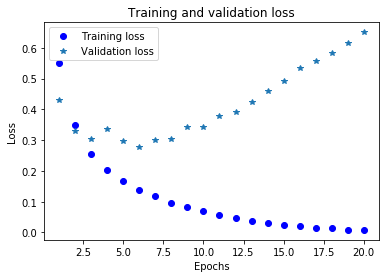

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy'])+1 )
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, '*', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

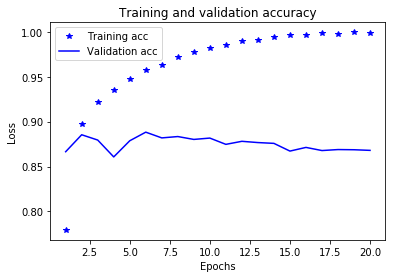

In [23]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'b*', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
model.predict(x_test)

array([[0.01144516],
       [1.        ],
       [0.9068392 ],
       ...,
       [0.00250274],
       [0.02048069],
       [0.75641197]], dtype=float32)